# Welcome

Welcome! This notebook demonstrates the effect of different kernels and the gamma parameter on the decision boundaries of a Support Vector Classifier (SVC) on a synthetic dataset. The first plot compares the linear, polynomial, and RBF kernels, and the second plot shows the effect of different gamma values on the RBF kernel.

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Generating and splitting data

In [2]:
# Generate a synthetic classification dataset
X_clf, y_clf = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0,
                                   n_clusters_per_class=1, flip_y=0.1, random_state=42)

In [3]:
# Split the dataset into training and testing sets
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.3, random_state=42)

Text(0.5, 1.0, 'Synthetic Classification Dataset')

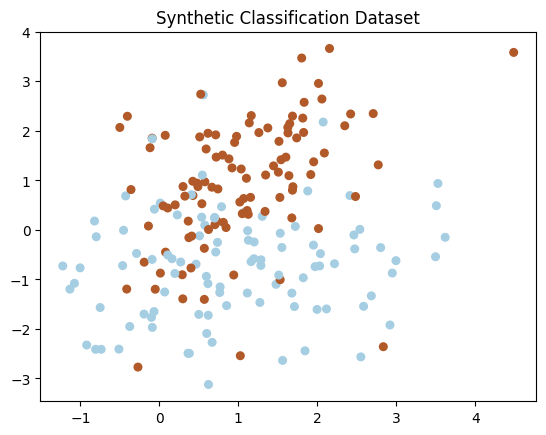

In [4]:
plt.scatter(X_clf[:,0], X_clf[:,1], c=y_clf, cmap=plt.cm.Paired, s=30)
plt.title("Synthetic Classification Dataset")

# Training

In [ ]:
# Define the kernels to compare
kernels = ["linear", "poly", "rbf"]
results_clf = {}

# Iterate over the kernels and train the SVC model
for kernel in kernels:
    clf = SVC(kernel=kernel, degree=3, C=1.0, gamma='scale')
    clf.fit(X_train_clf, y_train_clf)
    y_pred_clf = clf.predict(X_test_clf)
    acc_clf = accuracy_score(y_test_clf, y_pred_clf)
    results_clf[kernel] = acc_clf

# Visualizing kernel decision boundaries

Accuracy scores for different kernels on the synthetic classification dataset:
Linear kernel: 0.8000
Poly kernel: 0.7833
Rbf kernel: 0.8167


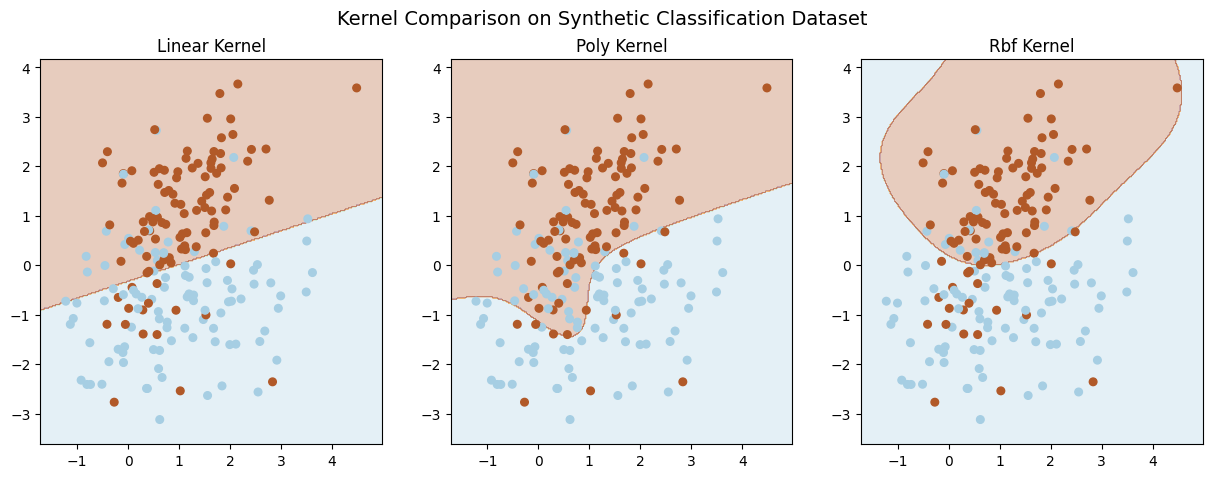

In [ ]:
# Display the accuracy scores
print("Accuracy scores for different kernels on the synthetic classification dataset:")
for kernel, acc in results_clf.items():
    print(f"{kernel.capitalize()} kernel: {acc:.4f}")

# Optional: Visualize the decision boundaries (similar to the moons example)
fig, axes = plt.subplots(1, 3, figsize=(15,5))

for ax, kernel in zip(axes, kernels):
    clf = SVC(kernel=kernel, degree=3, C=1.0, gamma='scale')
    clf.fit(X_train_clf, y_train_clf)

    # Decision region
    x_min, x_max = X_clf[:,0].min() - 0.5, X_clf[:,0].max() + 0.5
    y_min, y_max = X_clf[:,1].min() - 0.5, X_clf[:,1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)
    ax.scatter(X_clf[:,0], X_clf[:,1], c=y_clf, cmap=plt.cm.Paired, s=30)
    ax.set_title(f"{kernel.capitalize()} Kernel")

plt.suptitle("Kernel Comparison on Synthetic Classification Dataset", fontsize=14)
plt.show()

# Visualizing effect of gamma values on decision boundary

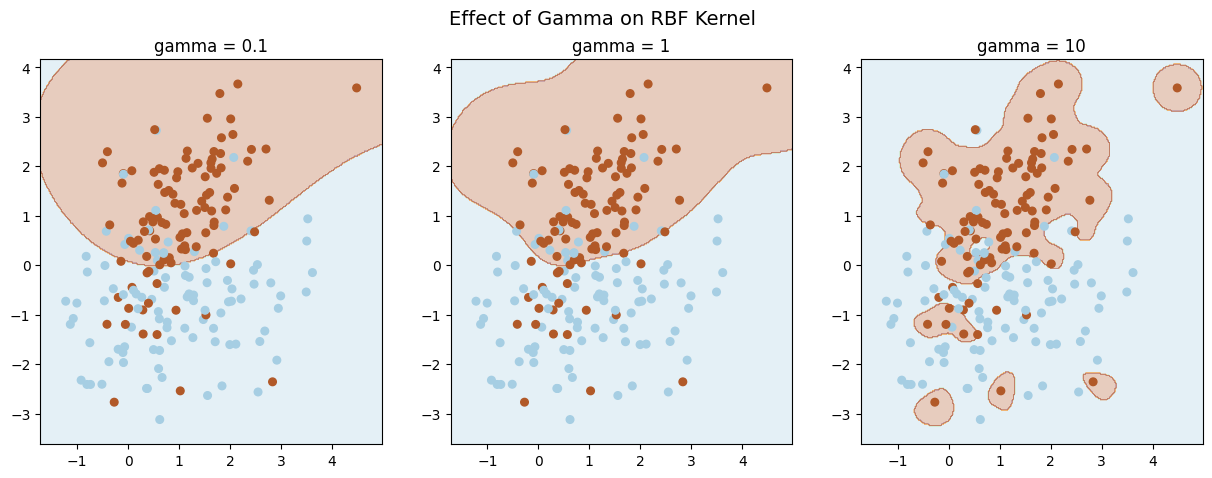

In [ ]:
gammas = [0.1, 1, 10]
fig, axes = plt.subplots(1, 3, figsize=(15,5))

for ax, g in zip(axes, gammas):
    clf = SVC(kernel="rbf", C=1.0, gamma=g)
    clf.fit(X_clf, y_clf)

    x_min, x_max = X_clf[:,0].min() - 0.5, X_clf[:,0].max() + 0.5
    y_min, y_max = X_clf[:,1].min() - 0.5, X_clf[:,1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)
    ax.scatter(X_clf[:,0], X_clf[:,1], c=y_clf, cmap=plt.cm.Paired, s=30)
    ax.set_title(f"gamma = {g}")

plt.suptitle("Effect of Gamma on RBF Kernel", fontsize=14)
plt.show()